# 앙상블(Ensemble)

* 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법
* 앙상블에는 크게 두가지 종류가 존재
  * 평균 방법
    * 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
    * 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
  * 부스팅 방법
    * 순차적으로 모델 생성
    * 결합된 모델의 편향을 감소 시키기 위해 노력
    * 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것

## Bagging meta-estimator

* bagging은 bootstrap aggregating의 줄임말
* 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
* 각각의 결과를 결합해 최종 결과를 생성
* 분산을 줄이고 과적합을 막음
* 강력하고 복잡한 모델에서 잘 동작

In [86]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_boston, load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [87]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [88]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

### Bagging을 사용한 분류

#### 데이터셋 불러오기

In [89]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()


#### KNN

##### 붓꽃 데이터

In [90]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [91]:
cross_val = cross_validate(
    estimator = base_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.002037668228149414 (+/- 0.0001680640011256308)
avg score time: 0.008093166351318359 (+/- 0.0055000684985618)
avg test score: 0.96 (+/- 0.024944382578492935)


In [92]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.02098541259765625 (+/- 0.007483007114961785)
avg score time: 0.0085296630859375 (+/- 0.0025198947578915407)
avg test score: 0.9399999999999998 (+/- 0.038873012632301994)


##### 와인 데이터

In [93]:
cross_val = cross_validate(
    estimator = base_model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0014718055725097656 (+/- 0.0005067334906927014)
avg score time: 0.0023969173431396484 (+/- 0.0006392634910753466)
avg test score: 0.9493650793650794 (+/- 0.037910929811115976)


In [94]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.01805429458618164 (+/- 0.0012986414264309983)
avg score time: 0.0072691917419433595 (+/- 0.00019369688828807716)
avg test score: 0.9498412698412698 (+/- 0.05379851926617549)


##### 유방암 데이터

In [95]:
cross_val = cross_validate(
    estimator = base_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.002380990982055664 (+/- 0.0006265186557571728)
avg score time: 0.006878471374511719 (+/- 0.00022947466092511357)
avg test score: 0.9648501785437045 (+/- 0.009609970350036127)


In [96]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.019449424743652344 (+/- 0.0008704405015200168)
avg score time: 0.014791297912597656 (+/- 0.0004957614821071756)
avg test score: 0.9613414066138798 (+/- 0.011881146717921549)


#### SVC

##### 붓꽃 데이터

In [97]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [98]:
cross_val = cross_validate(
    estimator = base_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0019538402557373047 (+/- 0.0004203935227550413)
avg score time: 0.0006459712982177735 (+/- 0.00014494960218048965)
avg test score: 0.9666666666666666 (+/- 0.02108185106778919)


In [99]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.025264263153076172 (+/- 0.0016945255826503148)
avg score time: 0.003275775909423828 (+/- 0.0007920013512155551)
avg test score: 0.9666666666666668 (+/- 0.02108185106778919)


##### 와인 데이터

In [100]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [101]:
cross_val = cross_validate(
    estimator = base_model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0026211261749267576 (+/- 0.0004702055747882237)
avg score time: 0.0007527828216552735 (+/- 0.0002012733316226115)
avg test score: 0.9833333333333334 (+/- 0.022222222222222233)


In [102]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.02614316940307617 (+/- 0.0019471537405345138)
avg score time: 0.003245639801025391 (+/- 0.00026018987332497866)
avg test score: 0.943968253968254 (+/- 0.030875362052280638)


##### 유방암 데이터

In [103]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [104]:
cross_val = cross_validate(
    estimator = base_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.006551122665405274 (+/- 0.001176034172090579)
avg score time: 0.0015764713287353515 (+/- 0.0003437965951119727)
avg test score: 0.9736376339077782 (+/- 0.014678541667933545)


In [105]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.03597679138183594 (+/- 0.0019272796190664008)
avg score time: 0.00680837631225586 (+/- 0.0003530587651804775)
avg test score: 0.9666356155876418 (+/- 0.016980668037288846)


#### Decision Tree

##### 붓꽃 데이터

In [106]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [107]:
cross_val = cross_validate(
    estimator = base_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0013847827911376953 (+/- 0.0007753293364289517)
avg score time: 0.0003984928131103516 (+/- 3.936191819840916e-05)
avg test score: 0.9600000000000002 (+/- 0.03265986323710903)


In [108]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.023459434509277344 (+/- 0.0021435683375057163)
avg score time: 0.002225971221923828 (+/- 3.2117947212911694e-05)
avg test score: 0.9466666666666667 (+/- 0.039999999999999994)


##### 와인 데이터

In [109]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [110]:
cross_val = cross_validate(
    estimator = base_model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0019410610198974609 (+/- 0.000528475711841686)
avg score time: 0.0005419254302978516 (+/- 0.0001947775024342074)
avg test score: 0.8765079365079365 (+/- 0.03321445165041705)


In [111]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.022931289672851563 (+/- 0.0014173544090043558)
avg score time: 0.002223300933837891 (+/- 2.3604836085443547e-05)
avg test score: 0.943968253968254 (+/- 0.03917645541143537)


##### 유방암 데이터

In [112]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [113]:
cross_val = cross_validate(
    estimator = base_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.008750152587890626 (+/- 0.0007850452024237707)
avg score time: 0.0006991863250732422 (+/- 0.00010251972287165672)
avg test score: 0.9120788697407235 (+/- 0.017848604808114784)


In [114]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0422917366027832 (+/- 0.0070669730631933185)
avg score time: 0.002798318862915039 (+/- 0.0001940566133565699)
avg test score: 0.9525850023288308 (+/- 0.021867676934473786)


### Bagging을 사용한 회귀

#### 데이터셋 불러오기

In [115]:
boston = load_boston()
diabetes = load_diabetes()

#### KNN

##### 보스턴 주택 가격 데이터

In [116]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [117]:
cross_val = cross_validate(
    estimator = base_model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.001535797119140625 (+/- 0.0005066100414923246)
avg score time: 0.002119636535644531 (+/- 0.0007096031562579924)
avg test score: 0.47357748833823543 (+/- 0.13243123464477455)


In [118]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.018856239318847657 (+/- 0.0016590966337642892)
avg score time: 0.009335899353027343 (+/- 0.00018702405601818991)
avg test score: 0.4281134023629676 (+/- 0.16014019221448095)


##### 당뇨병 데이터

In [119]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [120]:
cross_val = cross_validate(
    estimator = base_model,
    X = diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0016345500946044922 (+/- 0.0005236869902534827)
avg score time: 0.0024282455444335936 (+/- 0.0007963282104803903)
avg test score: 0.3689720650295623 (+/- 0.044659049060165365)


In [121]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.01835484504699707 (+/- 0.0032214269371374353)
avg score time: 0.009020471572875976 (+/- 0.00043309464581067954)
avg test score: 0.42088605551508085 (+/- 0.030854795724388515)


#### SVR

##### 보스턴 주택 가격 데이터

In [122]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [123]:
cross_val = cross_validate(
    estimator = base_model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.016364908218383788 (+/- 0.0022509170181996053)
avg score time: 0.002448844909667969 (+/- 0.00010147296394409225)
avg test score: 0.17631266230186618 (+/- 0.5224914915128981)


In [124]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.049827289581298825 (+/- 0.001188715168238144)
avg score time: 0.009255599975585938 (+/- 0.0015702306366204431)
avg test score: 0.15099089974323956 (+/- 0.2980805134200357)


##### 당뇨병 데이터

In [125]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [126]:
cross_val = cross_validate(
    estimator = base_model,
    X = diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.010957479476928711 (+/- 0.0008438370834929408)
avg score time: 0.0020035743713378907 (+/- 0.00017396746150289747)
avg test score: 0.14659936199629434 (+/- 0.02190798003342928)


In [127]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.04017634391784668 (+/- 0.0012951230384041308)
avg score time: 0.007086849212646485 (+/- 0.00014407621912656206)
avg test score: 0.07304539930781566 (+/- 0.021941910782427545)


#### Decision Tree

##### 보스턴 주택 가격 데이터

In [128]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [129]:
cross_val = cross_validate(
    estimator = base_model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.004976129531860352 (+/- 0.0011247688276026075)
avg score time: 0.001022005081176758 (+/- 0.0005420771263568763)
avg test score: 0.15846425667055702 (+/- 0.8103452487544287)


In [130]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.029263973236083984 (+/- 0.0016251491455024439)
avg score time: 0.0025106430053710937 (+/- 0.00021423920471726893)
avg test score: 0.34560156831270994 (+/- 0.3018908122053578)


##### 당뇨병 데이터

In [131]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [132]:
cross_val = cross_validate(
    estimator = base_model,
    X = diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0038018226623535156 (+/- 0.001214169773345361)
avg score time: 0.0007080554962158204 (+/- 0.0001068803020833131)
avg test score: -0.16027156844283524 (+/- 0.1368765819121471)


In [133]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0305203914642334 (+/- 0.002970732292969952)
avg score time: 0.0026628971099853516 (+/- 0.0002927265215145921)
avg test score: 0.3698072735769779 (+/- 0.028236293764049035)


## Forests of randomized trees

* `sklearn.ensemble` 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

In [134]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

### Random Forests 분류

In [135]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [136]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.13529510498046876 (+/- 0.011943525620047489)
avg score time: 0.008381414413452148 (+/- 0.0007029123071762423)
avg test score: 0.9666666666666668 (+/- 0.02108185106778919)


In [137]:
cross_val = cross_validate(
    estimator = model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.1341923236846924 (+/- 0.00519170736626687)
avg score time: 0.007845497131347657 (+/- 0.00015234186783321)
avg test score: 0.9665079365079364 (+/- 0.020746948644437477)


In [138]:
cross_val = cross_validate(
    estimator = model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.2004101276397705 (+/- 0.006154209102947703)
avg score time: 0.008915090560913086 (+/- 0.0007780244723249798)
avg test score: 0.9613569321533924 (+/- 0.023250157643480474)


### Random Forests 회귀

In [139]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [140]:
cross_val = cross_validate(
    estimator = model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.32596116065979003 (+/- 0.015538980434837717)
avg score time: 0.007920026779174805 (+/- 0.0005203061916813014)
avg test score: 0.6060237644202342 (+/- 0.23340144898776774)


In [141]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.25660552978515627 (+/- 0.009510090722991941)
avg score time: 0.007549858093261719 (+/- 6.223530552769711e-05)
avg test score: 0.41914697950669605 (+/- 0.04697543545939942)


### Extremely Randomized Trees 분류

In [142]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

In [143]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0907475471496582 (+/- 0.0029211487573678556)
avg score time: 0.008009386062622071 (+/- 0.0004934430950357705)
avg test score: 0.9533333333333334 (+/- 0.03399346342395189)


In [144]:
cross_val = cross_validate(
    estimator = model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.09445247650146485 (+/- 0.0026510170418730904)
avg score time: 0.008737564086914062 (+/- 0.0012559012713259927)
avg test score: 0.9777777777777779 (+/- 0.020786985482077462)


In [145]:
cross_val = cross_validate(
    estimator = model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.10943608283996582 (+/- 0.0040635158383949665)
avg score time: 0.010730838775634766 (+/- 0.0018085363078812278)
avg test score: 0.9683589504735288 (+/- 0.013145796199066048)


### Extremely Randomized Trees 회귀

In [146]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

In [147]:
cross_val = cross_validate(
    estimator = model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.18020391464233398 (+/- 0.005450919311132568)
avg score time: 0.007772111892700195 (+/- 0.00029652350160959396)
avg test score: 0.6215690662661427 (+/- 0.2571928975582332)


In [148]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.16018333435058593 (+/- 0.005503667660120516)
avg score time: 0.008128499984741211 (+/- 0.00029762453495710424)
avg test score: 0.43708646327453105 (+/- 0.05120865998468843)


### Random Forest, Extra Tree 시각화

* 결정 트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화

In [149]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [150]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13

In [151]:
iris = load_iris()
plot_idx = 1
models = [DecisionTreeClassifier(max_depth=None), 
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators)]

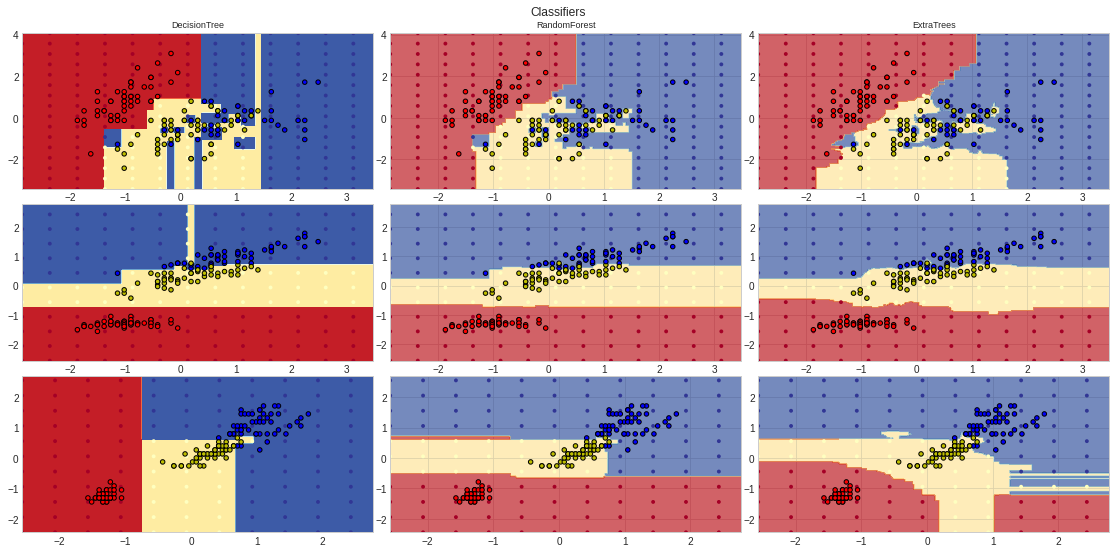

In [152]:
plt.figure(figsize=(16,8))

for pair in ([0,1], [0,2], [2,3]):
  for model in models:

    X = iris.data[:, pair]
    y = iris.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis = 0)
    std = X.std(axis = 0)
    X = (X - mean) / std

    model.fit(X,y)

    model_title = str(type(model)).split('.')[-1][:-2][:-len('Classifier')]

    plt.subplot(3, 3, plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)

    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    if isinstance(model, DecisionTreeClassifier):
      Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      cs = plt.contourf(xx, yy, Z, cmap=cmap)

    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)
      
    xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                         np.arange(y_min, y_max, plot_step_coarser))
    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(), yy_coarser.ravel()]).reshape(xx_coarser.shape)
    cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                            c=Z_points_coarser, cmap=cmap,
                            edgecolors='None')
    plt.scatter(X[:, 0], X[:, 1], c=y,
                cmap = ListedColormap(['r','y','b']),
                edgecolor = 'k', s=20)
    plot_idx += 1
  
plt.suptitle('Classifiers', fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

In [165]:
plot_idx = 1
models = [DecisionTreeRegressor(max_depth=None),
          RandomForestRegressor(n_estimators=n_estimators),
          ExtraTreesRegressor(n_estimators=n_estimators)]

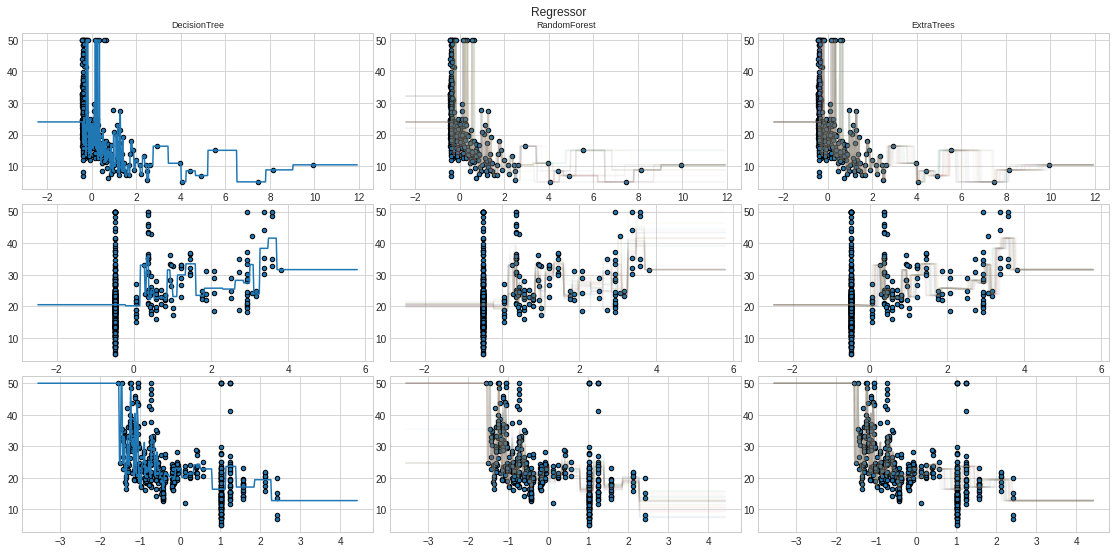

In [166]:
plt.figure(figsize=(16, 8))

for pair in (0, 1, 2):

  for model in models:

    X = boston.data[:, pair]
    y = boston.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    model.fit(X.reshape(-1, 1), y)

    model_title = str(type(model)).split('.')[-1][:-2][:-len('Regressor')]

    plt.subplot(3, 3, plot_idx)
    
    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)

    x_min, x_max = X.min()-1, X.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.arange(x_min-1, x_max+1, plot_step), np.arange(y_min-1, y_max+1, plot_step)

    if isinstance(model, DecisionTreeRegressor):
      Z = model.predict(xx.reshape(-1, 1))
      cs = plt.plot(xx,Z)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = tree.predict(xx.reshape(-1, 1))
        cs = plt.plot(xx,Z, alpha=estimator_alpha)

    plt.scatter(X, y, edgecolors='k', s=20)
    plot_idx += 1

plt.suptitle('Regressor', fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad = 0.2, w_pad = 0.2, pad=2.5)
plt.show()

## AdaBoost

* 대표적인 부스팅 알고리즘
* 일련의 약한 모델들을 학습
* 수정된 버전의 데이터를 반복 학습 (가중치가 적용된)
* 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
* 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
  * 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
  * 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

![AdaBoost](https://scikit-learn.org/stable/_images/sphx_glr_plot_adaboost_hastie_10_2_0011.png)

In [167]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

### AdaBoost 분류

In [168]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

In [169]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.06669549942016602 (+/- 0.0020997207138276045)
avg score time: 0.0064600944519042965 (+/- 6.786845233377564e-05)
avg test score: 0.9466666666666667 (+/- 0.03399346342395189)


In [170]:
cross_val = cross_validate(
    estimator = model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.07355203628540039 (+/- 0.0024035237304946993)
avg score time: 0.006519222259521484 (+/- 0.0002252711466594082)
avg test score: 0.8085714285714285 (+/- 0.16822356718459935)


In [171]:
cross_val = cross_validate(
    estimator = model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.15796294212341308 (+/- 0.004634605500958644)
avg score time: 0.008144426345825195 (+/- 0.0008054219923297416)
avg test score: 0.9701133364384411 (+/- 0.019709915473893072)


### AdaBoost 회귀

In [172]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)

In [173]:
cross_val = cross_validate(
    estimator = model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.09717788696289062 (+/- 0.004373183995147452)
avg score time: 0.004183626174926758 (+/- 0.0001687733849571055)
avg test score: 0.5985744583807469 (+/- 0.20937548598257683)


In [174]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.08646883964538574 (+/- 0.016772311834397643)
avg score time: 0.003748035430908203 (+/- 0.0006259761335567936)
avg test score: 0.41312084500745616 (+/- 0.04091835944493939)


## Gradient Tree Boosting

* 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
* 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

In [175]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

### Gradient Tree Boosting 분류

In [176]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

In [177]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.18853955268859862 (+/- 0.01573579213271673)
avg score time: 0.0012051582336425782 (+/- 0.00021300644100265522)
avg test score: 0.96 (+/- 0.024944382578492935)


In [178]:
cross_val = cross_validate(
    estimator = model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.2268217086791992 (+/- 0.010528799358024485)
avg score time: 0.0009874820709228516 (+/- 6.079353997292009e-05)
avg test score: 0.9330158730158731 (+/- 0.04127777701479872)


In [179]:
cross_val = cross_validate(
    estimator = model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.4302221298217773 (+/- 0.007413002912231219)
avg score time: 0.0010070323944091797 (+/- 2.838378941891793e-05)
avg test score: 0.9596180717279925 (+/- 0.02453263202329889)


### Gradient Tree Boosting 회귀

In [180]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
)

In [181]:
cross_val = cross_validate(
    estimator = model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.12033958435058593 (+/- 0.004132104388186442)
avg score time: 0.0009923458099365234 (+/- 2.2200034605158238e-05)
avg test score: 0.6752372690883461 (+/- 0.16121836382662494)


In [182]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.09288177490234376 (+/- 0.003032308420990073)
avg score time: 0.0010146141052246095 (+/- 2.0747403389390904e-05)
avg test score: 0.4029450867301339 (+/- 0.0688801507855847)


## 투표 기반 분류 (Voting Classifier)

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
  * 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  * 예측된 확률의 가중치 평균 (soft voting)

In [183]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [185]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators =[('svc',model1), ('naive',model2), ('forest',model3)],
    voting = 'hard'
)

In [186]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv=5)
  print('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.97 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.97 (+/- 0.02) [VotingClassifier]


In [187]:
model1 = SVC(probability=True)
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators =[('svc',model1), ('naive',model2), ('forest',model3)],
    voting = 'soft',
    weights=[2,1,2]
)

In [188]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv=5)
  print('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.95 (+/- 0.03) [RandomForestClassifier]
Accuracy: 0.96 (+/- 0.02) [VotingClassifier]


### 결정 경계 시각화

In [189]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product

In [190]:
X = iris.data[:, [0,2]]
y = iris.target

In [191]:
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(gamma=.1, kernel='rbf', probability=True)
vote_model = VotingClassifier(estimators=[('dt', model1), ('knn', model2), ('svc', model3)],
                              voting = 'soft',
                              weights = [2,1,2])
model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

In [192]:
x_min, x_max = X[:, 0].min() -1, X[:, 0].max() +1
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

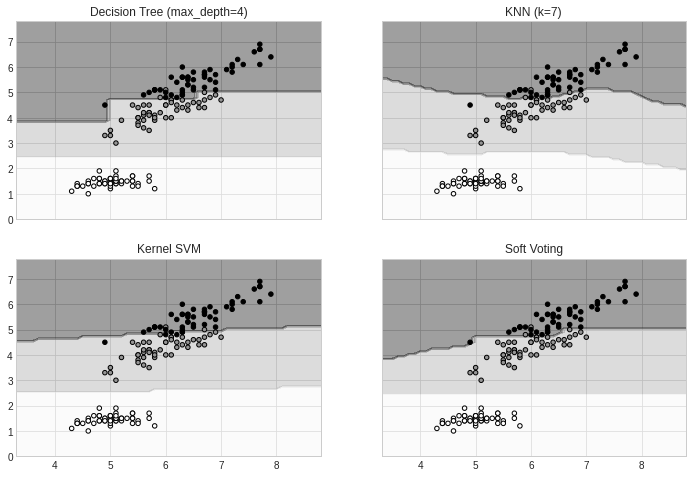

In [194]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1, model2, model3, vote_model],
                          ['Decision Tree (max_depth=4)','KNN (k=7)', 'Kernel SVM', 'Soft Voting']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
  axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 투표 기반 회귀 (Voting Regressor)

* 서로 다른 모델의 예측 값의 평균을 사용

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [196]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators = [('linear',model1), ('gbr', model2), ('rfr',model3)],
    weights = [1, 1, 1]
)

In [197]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, boston.data, boston.target, cv=5)
  print('R2: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

R2: 0.35 (+/- 0.38) [LinearRegression]
R2: 0.67 (+/- 0.16) [GradientBoostingRegressor]
R2: 0.63 (+/- 0.21) [RandomForestRegressor]
R2: 0.66 (+/- 0.20) [VotingRegressor]


### 회귀식 시각화

In [198]:
X = boston.data[:, 0].reshape(-1,1)
y = boston.target

In [199]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators = [('linear',model1), ('gbr', model2), ('rfr',model3)],
    weights = [1, 1, 1]
)
model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
vote_model = vote_model.fit(X,y)

In [200]:
x_min, x_max = X.min()-1, X.max()+1
xx = np.arange(x_min-1, x_max+1, 0.1)

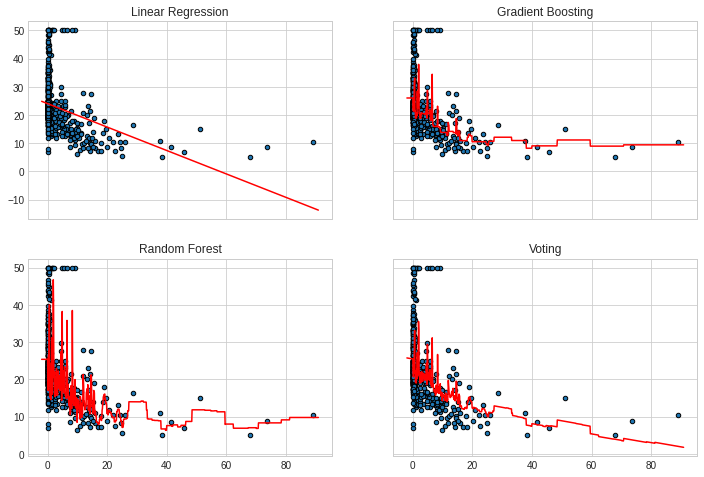

In [203]:
f, axarr = plt.subplots(2,2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0,1], [0, 1]),
                          [model1, model2, model3, vote_model],
                          ['Linear Regression', 'Gradient Boosting', 'Random Forest', 'Voting']):
  Z = model.predict(xx.reshape(-1, 1))

  axarr[idx[0], idx[1]].plot(xx, Z, c='r')
  axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 스택 일반화 (Stacked Generalization)

* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편향을 줄이는데 효과적

### 스택 회귀

In [204]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [205]:
estimators = [('ridge', Ridge()),
              ('lasso', Lasso()),
              ('svr', SVR())]

In [206]:
reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators = estimators,
        final_estimator = GradientBoostingRegressor()
    )
)

In [207]:
cross_val = cross_validate(
    estimator = reg,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.1488056182861328 (+/- 0.01031748305266389)
avg score time: 0.0030404090881347655 (+/- 7.988646327940038e-05)
avg test score: 0.3193125598078287 (+/- 0.3328757426063098)


#### 회귀식 시각화

In [ ]:
X = boston.data[:, 0].reshape(-1,1)
y = boston.target

In [208]:
model1 = Ridge()
model2 = Lasso()
model3 = SVR()
reg = StackingRegressor(
    estimators = estimators,
    final_estimator = GradientBoostingRegressor()
)
model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
reg = reg.fit(X,y)

In [209]:
x_min, x_max = X.min()-1, X.max()+1
xx = np.arange(x_min-1, x_max+1, 0.1)

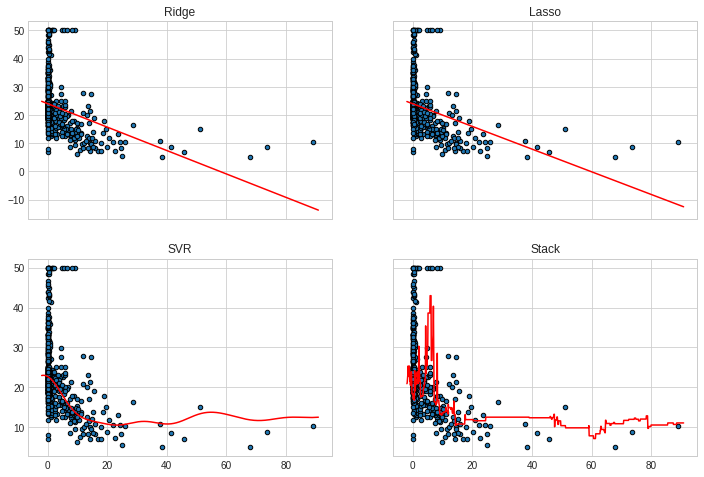

In [210]:
f, axarr = plt.subplots(2,2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0,1], [0, 1]),
                          [model1, model2, model3, reg],
                          ['Ridge', 'Lasso', 'SVR', 'Stack']):
  Z = model.predict(xx.reshape(-1, 1))

  axarr[idx[0], idx[1]].plot(xx, Z, c='r')
  axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### 스택 분류

In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [216]:
estimators = [('logistic', LogisticRegression(max_iter=10000)),
               ('svc', SVC()),
               ('naive', GaussianNB())]

In [217]:
clf = StackingClassifier(
    estimators =estimators,
    final_estimator = RandomForestClassifier()
)

In [218]:
cross_val = cross_validate(
    estimator = clf,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.2988864898681641 (+/- 0.006339084342374541)
avg score time: 0.008646154403686523 (+/- 0.00011553446513050082)
avg test score: 0.96 (+/- 0.024944382578492935)


#### 결정 경계 시각화

In [222]:
X = iris.data[:, [0,2]]
y = iris.target

In [225]:
model1 = LogisticRegression(max_iter=10000)
model2 = SVC()
model3 = GaussianNB()
stack = StackingClassifier(
    estimators = estimators,
    final_estimator = RandomForestClassifier()
)
model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
stack = stack.fit(X, y)

In [226]:
x_min, x_max = X[:, 0].min() -1, X[:, 0].max() +1
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

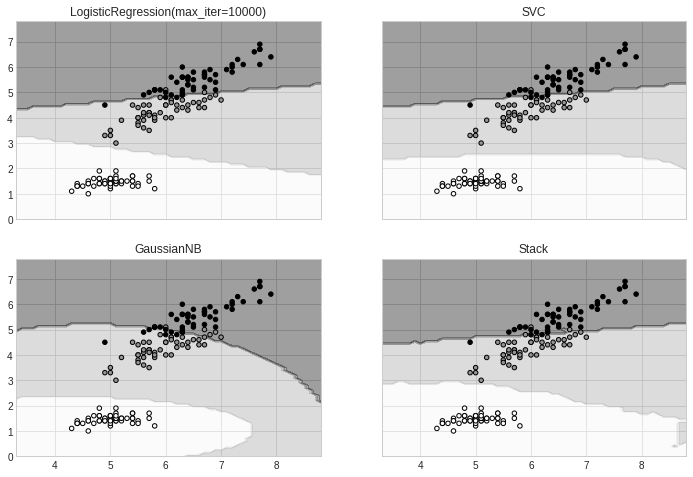

In [227]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1, model2, model3, stack],
                          ['LogisticRegression(max_iter=10000)','SVC', 'GaussianNB', 'Stack']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
  axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()